<a href="https://colab.research.google.com/github/savig-vi/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def display_results(y_test, y_pred, cm_title):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title(cm_title)
    print(classification_report(y_test,y_pred))

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amateurdev29/doan_ttnt1/main/Hotel%20Reservations.csv',encoding='unicode_escape')
df = pd.DataFrame(data)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
type_of_meal_plan_mapping = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3}
df['type_of_meal_plan'] = df['type_of_meal_plan'].map(type_of_meal_plan_mapping)

room_type_reserved_mapping = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6,'Room_Type 7':7}
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_reserved_mapping)

market_segment_type_mapping = {'Online':1, 'Offline':2, 'Corporate':3, 'Complementary':4, 'Aviation':5}
df['market_segment_type'] = df['market_segment_type'].map(market_segment_type_mapping)

booking_status_mapping = {'Not_Canceled':0, 'Canceled':1}
df['booking_status'] = df['booking_status'].map(booking_status_mapping)

In [5]:
# Hàm isna() dùng để kiểm tra giá trị thiếu, ở đây kiểm tra giá trị thiếu của từng cột và đếm tổng số lượng thiếu từng cột
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.fillna(df.mean(), inplace=True, axis=0)
df = df.round()
df

<ipython-input-6-b2322ee4780e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True, axis=0)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.0,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,107.0,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.0,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.0,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,1,0,4,85,2018,8,3,1,0,0,0,168.0,1,0
36271,INN36272,2,0,1,3,1,0,1,228,2018,10,17,1,0,0,0,91.0,2,1
36272,INN36273,2,0,2,6,1,0,1,148,2018,7,1,1,0,0,0,98.0,2,0
36273,INN36274,2,0,0,3,0,0,1,63,2018,4,21,1,0,0,0,94.0,0,1


In [7]:
df = df.drop('Booking_ID', axis=1)
X = df.iloc[:, :17]
y = df.iloc[:,17]

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

In [20]:
X_std

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.298889,-0.261467,0.217398,-0.144801,0.104197,-0.178817,-0.506404,1.614874,-2.137440,0.839230,-1.555641,0.810590,-0.162208,-0.063392,-0.087455,-1.094865,-0.788129
1,0.298889,-0.261467,1.365974,0.563964,-1.978307,-0.178817,-0.506404,-0.933688,0.467837,1.164974,-1.097998,-0.656683,-0.162208,-0.063392,-0.087455,0.102215,0.483754
2,-1.628953,-0.261467,1.365974,-0.853566,0.104197,-0.178817,-0.506404,-0.980237,0.467837,-1.766723,1.419035,-0.656683,-0.162208,-0.063392,-0.087455,-1.237374,-0.788129
3,0.298889,-0.261467,-0.931177,-0.144801,0.104197,-0.178817,-0.506404,1.463590,0.467837,-0.789491,0.503751,-0.656683,-0.162208,-0.063392,-0.087455,-0.097299,-0.788129
4,0.298889,-0.261467,0.217398,-0.853566,-1.978307,-0.178817,-0.506404,-0.433285,0.467837,-1.115235,-0.525945,-0.656683,-0.162208,-0.063392,-0.087455,-0.268310,-0.788129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226730,-0.261467,1.365974,2.690259,0.104197,-0.178817,1.636681,-0.002706,0.467837,0.187742,-1.441230,-0.656683,-0.162208,-0.063392,-0.087455,1.840830,0.483754
36271,0.298889,-0.261467,0.217398,0.563964,0.104197,-0.178817,-0.506404,1.661423,0.467837,0.839230,0.160519,-0.656683,-0.162208,-0.063392,-0.087455,-0.353816,1.755637
36272,0.298889,-0.261467,1.365974,2.690259,0.104197,-0.178817,-0.506404,0.730442,0.467837,-0.138002,-1.670051,-0.656683,-0.162208,-0.063392,-0.087455,-0.154302,1.755637
36273,0.298889,-0.261467,-0.931177,0.563964,-1.978307,-0.178817,-0.506404,-0.258726,0.467837,-1.115235,0.618161,-0.656683,-0.162208,-0.063392,-0.087455,-0.268310,-0.788129


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state = 42)

svm = SVC()

parameters_dictionary = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(svm,
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .kernel=linear;, score=(train=0.663, test=0.666) total time=  31.0s
[CV 2/5] END .kernel=linear;, score=(train=0.666, test=0.667) total time=  22.9s
[CV 3/5] END .kernel=linear;, score=(train=0.665, test=0.675) total time=  23.8s
[CV 4/5] END .kernel=linear;, score=(train=0.672, test=0.656) total time=  24.3s
[CV 5/5] END .kernel=linear;, score=(train=0.665, test=0.668) total time=  23.4s
[CV 1/5] END ...kernel=poly;, score=(train=0.701, test=0.681) total time=  15.6s
[CV 2/5] END ...kernel=poly;, score=(train=0.699, test=0.691) total time=  15.8s
[CV 3/5] END ...kernel=poly;, score=(train=0.698, test=0.690) total time=  14.6s
[CV 4/5] END ...kernel=poly;, score=(train=0.699, test=0.680) total time=  15.8s
[CV 5/5] END ...kernel=poly;, score=(train=0.696, test=0.675) total time=  14.5s
[CV 1/5] END ....kernel=rbf;, score=(train=0.751, test=0.733) total time=  15.6s
[CV 2/5] END ....kernel=rbf;, score=(train=0.753,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1', verbose=3)

In [9]:
grid_search.best_estimator_.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
grid_save = grid_search
joblib.dump(grid_save, '/content/drive/MyDrive/Colab Notebooks/grid.joblib')

['/content/drive/MyDrive/Colab Notebooks/grid.joblib']

In [11]:
grid_load = joblib.load('/content/drive/MyDrive/Colab Notebooks/grid.joblib')

In [12]:
y_pred = grid_load.best_estimator_.predict(X_test)

In [13]:
best_parameters = grid_load.best_params_ # Show the best hyperparameters for SVC
best_f1 = grid_load.best_score_ # Show the best f1-score 

print('The best model was:', grid_load.best_estimator_)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC()
The best parameter values were: {'kernel': 'rbf'}
The best f1-score was: 0.733810940820286


In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6723,  553],
       [1183, 2424]])

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In ra màn hình các thông số đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8404851603418175
Precision: 0.814242526032919
Recall: 0.6720266149154422
F1-Score: 0.7363304981773997


              precision    recall  f1-score   support

           0       0.85      0.92      0.89      7276
           1       0.81      0.67      0.74      3607

    accuracy                           0.84     10883
   macro avg       0.83      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



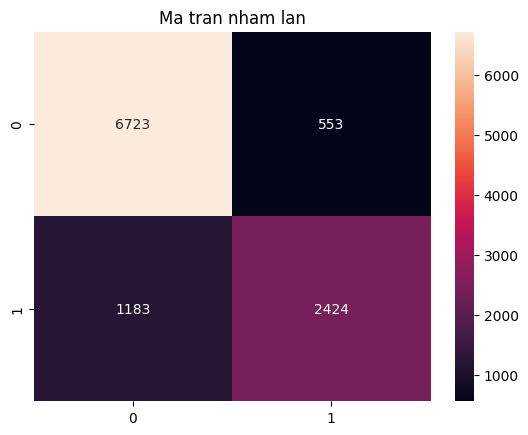

In [16]:
display_results(y_test, y_pred, 'Ma tran nham lan')